In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys

def read(U):
    data = []
    for i in range(1,31,1):
        path = '../instances/md-vrbsp/U_' + str(U) + '/MD-VRBSP_U_' + str(U) + '_' + str(i) + '.txt'
        file = open(path, 'r')
        lines = file.readlines()
        start = (4 + U * 2)
        end = start + U

        target = [float(x.replace('\n', '')) for x in lines[start:end]]
        data.append(target)
        
    df_aux = pd.DataFrame(data)
    df = df_aux
    
    return df

In [94]:
df = read(16)
# df

In [95]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,446.148776,582.347047,568.916260,714.980724,589.143631,650.499824,673.793489,595.294924,679.273640,559.005521,601.669929,688.360348,644.531218,600.407474,644.514610,521.698018
std,346.637680,338.383071,383.017172,322.396976,343.285730,390.674213,308.666399,367.123144,337.525843,323.673274,303.969817,368.709313,368.878695,331.736982,364.544278,344.337121
min,20.055270,25.978720,44.501174,27.237810,11.182749,13.263493,100.243665,3.430998,60.043068,6.366304,165.546897,26.392434,5.577697,11.760980,63.479324,16.311555
25%,208.274502,352.238695,188.488030,516.176018,330.648408,288.131340,462.792580,266.851445,500.000976,330.320706,330.029785,300.232606,355.796503,378.183539,323.257834,257.584500
50%,333.505875,644.102277,479.856622,747.902014,586.157784,666.267183,710.221046,656.026282,692.456343,564.609763,582.869493,775.809135,654.584795,539.219010,639.446064,433.930468
75%,544.565992,818.173043,934.856132,931.031198,828.653161,1003.967908,934.972766,887.046589,955.116576,874.127468,821.510076,1008.795802,1028.395954,837.045154,962.113703,700.303286
max,1187.894683,1192.437506,1184.450956,1185.944101,1197.908044,1176.077182,1101.279970,1199.756346,1190.712084,1078.831648,1188.841691,1196.202594,1135.866789,1160.166979,1198.799711,1164.213543


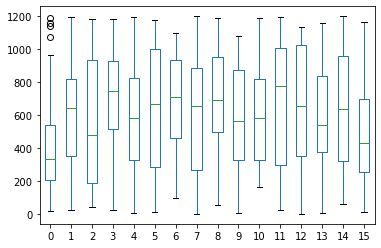

In [96]:
boxplot = df.boxplot(grid=False)

In [97]:
maxdata = [143.4, 286.8, 600.5, 1201]
att = np.zeros(4, dtype=int)

medarr = df.median().to_numpy()

for x in medarr:
    for j in range(len(att)):
        if (medarr[i] <= maxdata[j]):
            att[j] += 1
            
print(att)

NameError: name 'i' is not defined

In [135]:
def read_vrbsp_solution(U, prefix):
    dic = {20: 0, 40: 0, 80: 0, 160: 0}
    mean = 0
    for i in range(1, 31, 1):        
        path = prefix + str(U) + '/solution' + str(i) + '.txt'
        
        with open(path, 'r') as file:
            lines = file.readlines()
            if not lines:
                print(str(U) + ' ' + str(i) + ' empty')
                continue
                
            curr = 0
            if lines[0] == '\n':
                curr = 1
                
            throughput, ts = lines[curr].split(' ')
            mean += float(throughput)

            curr += 1
            specs = int(lines[curr])
            for j in range(specs):
                curr += 1
                chs = int(lines[curr])
                # print('tem ' + str(chs) + ' canais')
                for k in range(chs):
                    curr += 1
                    # print(curr)
                    spt = lines[curr].split(' ')
                    # print(spt)
                    if int(spt[0]) in dic:
                        dic[int(spt[0])] += 1
            
    print(mean / 30)
    return dic

48932.46333333333
61633.043333333335
{20: 30, 40: 82, 80: 21, 160: 59}
{20: 30, 40: 120, 80: 0, 160: 60}


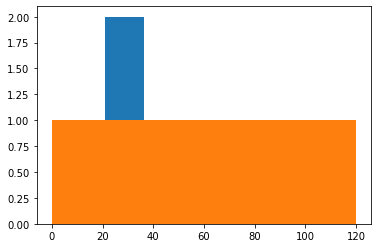

In [146]:
U = [256] #, 16, 32, 64, 128, 256, 512, 1024, 2048]

for u in U:
    heu = read_vrbsp(u, '../results_final/vns/vrbsp-heu/U_')
    vns = read_vrbsp(u, '../results_final/vns/vrbsp/U_')
    
    heu_dt = heu.values()
    vns_dt = vns.values()
    
    print(heu)
    print(vns)
    
    
    plt.hist(heu_dt,bins=4)
    plt.hist(vns_dt,bins=4)